Лабораторна робота №7
Студента групи МІТ-31 (підгрупа 1)
Карєва Івана Олександровича

Мета:
Розробка та порівняння моделей глибокого навчання для мультикласової класифікації трьох класів зображень їжі, а також використання transfer learning для покращення результатів.

Дані:
Набір даних: 10_food_classes_all_data.zip.

Завдання:
Вибір Класів:

Виберіть три класи з набору даних для класифікації на основі методики вибору з практичної роботи.
Попередня Обробка:

Завантажте та розпакуйте набір даних.
Поділіть дані на тренувальний, валідаційний та тестовий набори.
Виконайте необхідну попередню обробку даних.
Розробка та Тренування Моделей:

Створіть три різні моделі глибокого навчання для класифікації обраних класів. Наприклад, ви можете змінювати архітектуру, кількість шарів, активаційні функції тощо.
Тренуйте кожну модель на тренувальному наборі даних та валідуйте їх на валідаційному наборі.
Оцінка Моделей:

Оцініть кожну модель на тестовому наборі даних.
Запишіть та порівняйте результати точності та часу тренування для кожної моделі.
Додаткове Завдання (на високу оцінку):

Використайте transfer learning з використанням EfficientNet з TensorFlow Hub для класифікації тих самих трьох класів.
Порівняйте результати цієї моделі з попередніми трьома за точністю та часом тренування.
Додаткові Вимоги:
Використовуйте TensorFlow та інші відповідні бібліотеки для реалізації проекту.
Забезпечте чистоту коду та його належне коментування.


Found 2250 images belonging to 3 classes.
Found 750 images belonging to 3 classes.
Кількість класів: 3


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                

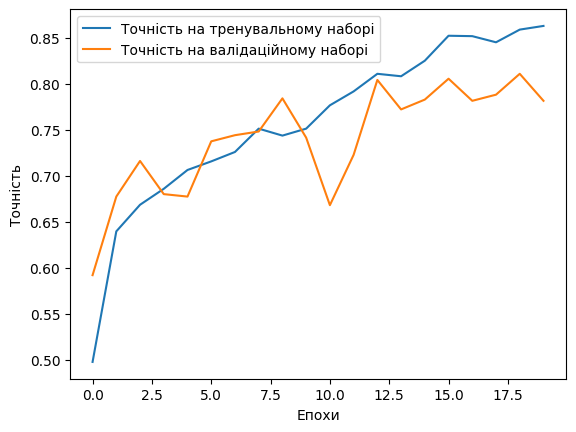

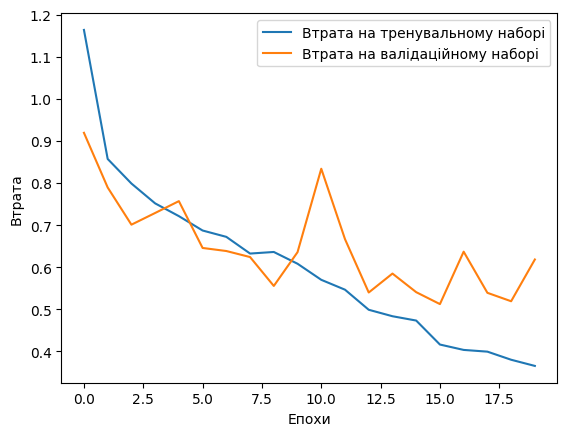

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Шляхи до папок з тренувальними та тестовими даними
train_data_dir = 'train'
test_data_dir = 'test'

# Розмір зображень 
image_size = (224, 224)

# Задайте параметри ImageDataGenerator для попередньої обробки даних
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

# Завантаження та попередня обробка тренувальних даних
train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                    target_size=image_size,
                                                    batch_size=32,
                                                    class_mode='categorical')

# Завантаження та попередня обробка тестових даних
test_generator = test_datagen.flow_from_directory(test_data_dir,
                                                  target_size=image_size,
                                                  batch_size=32,
                                                  class_mode='categorical')

# Виведення інформації про кількість класів
num_classes = len(train_generator.class_indices)
print(f"Кількість класів: {num_classes}")


# Створення моделі
def create_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(3, activation='softmax')  # 3 класи
    ])
    
    # Компіляція моделі
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

# Створення моделі
model = create_model()

# Виведення інформації про структуру моделі
model.summary()

# Тренування моделі
epochs = 20
history = model.fit(train_generator, epochs=epochs, validation_data=test_generator)

# Графіки точності та втрати
plt.plot(history.history['accuracy'], label='Точність на тренувальному наборі')
plt.plot(history.history['val_accuracy'], label='Точність на валідаційному наборі')
plt.xlabel('Епохи')
plt.ylabel('Точність')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Втрата на тренувальному наборі')
plt.plot(history.history['val_loss'], label='Втрата на валідаційному наборі')
plt.xlabel('Епохи')
plt.ylabel('Втрата')
plt.legend()
plt.show()